<H1>Rubber band dynamics II: Diffusion</H1>

(Sethna, "Entropy, Order Parameters, and Complexity", ex. XXX)

© 2024, James Sethna, all rights reserved.

Import packages

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

"RB dynamics I" studied the dynamic fluctuations of an
entropic model for a rubber band: $N$ segments of length $d=1$, fluctuating
between pointing forward and backward at random. It studied the random
walk of lengths $L$ as the segments hopped, both without and with an
external parabolic potential stretching the band. Here we shall derive a spatially
dependent diffusion equation describing the evolution of the probability
distribution of lengths with time, in the limit of large $N$.



Current is flow forward minus flow backward. The current past
the midpoint $L_o = L+1$ between two possible lengths $L$ and $L+2$ is
given by the probabilities $\rho(L)$ and $\rho(L+2)$ times the probabilities
$P^\pm$ of flipping forward and backward. (For this exercise, we shall assume $N$
is even.)

Since the sum of the probabilities
of being at length $L$, $\sum_{L=-N}^N p_L = 1$, is constant, and our
dynamics only shifts $L$ locally (by $\pm 2 \ll N)$, we are advised to write
our dynamics in terms of the probability current. Note that $p_L = 0$ for odd integers $L$.
Let $J(L_o)$, for odd $L_o$
(midway between possible lengths of the chain) be the net current
from $L-1$ to $L+1$ per segment flip. In "RB dynamics I", we gave the probability $P^+(L)$ per flip
that a chain of length $L$ will grow to $L+2$
(contributing to $J$ at $L_o = L+1$),
and $P^-(L)$ that a chain of length $L$ will shrink to $L-2$.
(contributing to $J$ at $L_o = L-1$).


(a) <em> Our rubber band ensemble at time $t$ has probability $p(L)$ of
having length $L$. Argue that the probability current
$J(L_o)$ of our rubber band ensemble
growing past the (odd) length $L_o$ is
\begin{equation}
J(L_o) \Delta t = p(L_o-1) P^+(L_o-1) - p(L_o+1) P^-(L_o+1)
\end{equation}
where $\Delta t$ is the time for one segment flip.
</em>

Here by convention we set $\Delta t = 1/N$,
so a sweep that flips every segment on average once takes one unit of time.


<span style="color: red;">
    
Your answer here (or in a separate writeup). Double click to edit. Latex works too ($E=m c^2$).

In taking the continuum
limit as $N\to\infty$ (figure below), let us keep the total unfolded length fixed. To do
so, we use $x = L/N$. Also, the harmonic stretching force
$F = \alpha L = \alpha N x$, so we change variables to
$a = N \alpha$. Finally, the probability $p(L)$ represents the
probability density $\rho(x)$ between $L-1$ and $L+1$
(i.e., $x-1/N$ and $x+1/N$), so we substitute $\rho(x) (2/N)$ for $p(L)$.

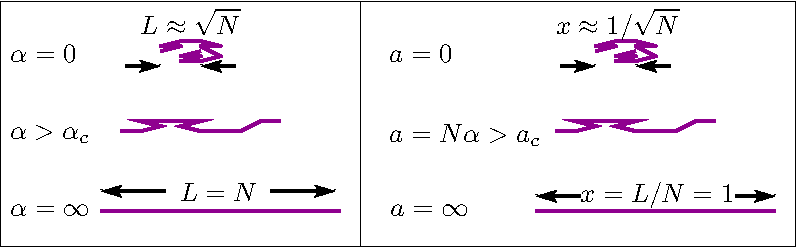

Changing to contiuum variables. In going from the microscopic
description to the continuum limit, we change all lengths by a factor of
$N$, we change the negative ``spring'' constant $\alpha$ to $a = N \alpha$,
and we change from probabilities $p(L)$ to probability densities
$\rho(x) = p(L) N/2$.

(b) <em> Substituting $L = N x$, $\alpha = a/N$, and $P^{\pm}$, show that
\begin{equation}
J(L) = \frac{e^{a x} (1-x+1/N) \rho(x-1/N) - e^{-a x} (1+x+1/N) \rho(x+1/N)}
                {e^{a x} + e^{-a x}}
\end{equation}
</em>

<span style="color: red;">
    
Your answer here. Double click to edit. 

(c) <em> What is the net current $J$ in the limit $N \to \infty$ 
 (holding $a$ and $x$ constant)?
Use the fact that 
$(e^{a x} - e^{-a x}) / (e^{a x} + e^{-a x}) = \tanh(a x)$ to
remove the exponentials from your answer, and show your work.
Argue that the end of the rubber band as $N\to\infty$
has a position-dependent velocity 
\begin{equation}
\label{eq:RBvOfx}
v(x) = \tanh(a x) - x. 
\end{equation}
In 'RB Dynamics I'(e), you found that for a 
large $a$ the length quickly moved to a final off-center
position. Find a numerical solution for this final length at
$a=0.75$ and $a=1.5$ for $N\to\infty$. Derive from $v(x)$ the
critical value $a_c$ when the rubber band equilibrium length splits
away from the origin.
</em>

<span style="color: red;">
    
Your answer here. Double click to edit. 


(d) <em> Using your random-walk simulation from
"RB Dynamics I", make a histogram of lengths
for $N=100$ at $a = 0.75$ and $N=1000$ at $a=1.5$, adding points until
you get good histograms. When necessary, drop the transient first part
of the trajectory, while the rubber band moves from zero to the new minimum.
Are your histograms concentrated
near the predicted value you found in part (c)?

<span style="color: green;">
We supply the complete code here. You may wish to substitute your answer from RB Dynamics I, or use this to help solve the previous problem.
</span>

In [ ]:
def E(L,alpha):
    return -(1/2)*alpha*L**2

def Pplus(L,N,alpha):
    return ((N-L)/(2*N)) * (1/(1+np.exp(E(L+2,alpha)-E(L,alpha))))

def Pminus(L,N,alpha):
    return ((N+L)/(2*N)) * (1/(1+np.exp(E(L-2,alpha)-E(L,alpha))))

def HeatBathFlip(L, N, alpha):
    """
    """
    r = np.random.random()
    if r < Pplus(L,N,alpha):
        return L+2
    elif r < Pplus(L,N,alpha)+Pminus(L,N,alpha):
        return L-2
    else:
        return L
        
def IterateHBFlips(N, alpha, nSteps, L0=0):
    L = L0
    traj = [L]
    for n in range(nSteps):
        L = HeatBathFlip(L, N, alpha)
        traj.append(L)
    Delta_t = 1./N;
    ts = Delta_t * np.arange(nSteps+1)
    return ts, traj

In [ ]:
N = 100;
alpha = 0....;
ts, trajectory = IterateHBFlips(...);
plt.plot(...)
plt.figure()
plt.hist(..., density=True, bins=[n for n in range(-100,100,2)]);

In [ ]:
N = 1000;
...
plt.hist(trajectory[15000:], density=True, bins=[n for n in range(-N,N,2)]);

<span style="color: red;">
    
Your answer here. Double click to edit. 


    
(e) <em> Starting at $x = 0$, launch a trajectory for $N=1000$ and
$a = 1.5$, and examine how it flows to its final value once it
deviates from the local fixed point at zero (say, in the first 20000
segment flips). Compare the flow to that predicted by your equation
for the velocity as a function of length in part (c). (That is,
numerically solve $d{x}/d{t} = v(x)$ from part (c), starting from a small positive
or negative value of $x$, and rescale it from from $x$ and $a$, to $L$
and $\alpha$.) The time spent in the vicinity of $L=0$
in the random walk will depend on the fluctuations. Adjust the theory
curve right and left to make a good comparison.
    </em>

In [ ]:
# This will re-use the last 'trajectory' you ran.

def v(x,t,a):
    return np.tanh(...)-...

a = N*alpha

tsTheory = np.arange(0,40,0.1)

# odeint(v,v0,ts,args) solves dx/dt = v(x,args) 
# starting at v0, returning v(ts)
sol = odeint(v,0.001,tsTheory,args=(a,))

# Subtract time shift from tsTheory to align with trajectory
plt.plot(tsTheory-..., N * sol);

# Now plot the trajectory saved from a different window
plt.plot(ts,trajectory)

The current in the limit $N\to\infty$ is the answer that 
the continuum limit supplies. Thermodynamics and other continuum theories often ignore
the fluctuations in the system. We can
study the statistical mechanics of the fluctuations by studying the
leading corrections in $1/N$.

(f) <em> Now find the first correction in $1/N$ to the net current.
Write the current to this order in the form 
    
\begin{equation}
J(x) = (v(x) + v_1(x)/N) \rho(x) 
                - D(x) \partial \rho / \partial x.
\end{equation} 
    
Calculate $v_1(x)$. Show that  
    
\begin{equation}
D(x) = (1 - x \tanh(a x))/N.
\end{equation}

<em>


<span style="color: red;">
    
Your answer here. Double click to edit. 

The corrections $v_1(x)$ make tiny corrections to the fixed point
of part (d) and the velocity curve of part (e) above --
unimportant for large $N$. But the term proportional to $\partial \rho/ \partial x$,
the typical domain of statistical mechanics, dominates many of the
properties.) 

(g) <em>
Write the emergent forced diffusion equation governing
our entropic rubber band. (To simplify things, leave it in 
terms of $v$, $D$,
$\rho$, and their derivatives. Ignore the terms involving $v_1$.)
</em>


<span style="color: red;">
    
Your answer here. Double click to edit. 

(h)<em> Approximate your differential equation to linear order in $x$ about zero (again ignoring $v_1$), and solve your diffusion
equation for the stationary
distribution at $a = 0.75$. (Hint: Solving for the distribution that
makes the current equal to zero is easier. Try a Gaussian.)
Compare to a histogram of equilibrated values of your random walk simulation.
<em>


<span style="color: red;">
    
Your answer here. Double click to edit. 

In [ ]:
N = 100;
alpha = 0.0075;
... = IterateHBFlips(...,100000);
plt.plot(...)
plt.figure()
plt.hist(..., ...);
a = N*alpha
sigma2x = ...
sigma2L = ...**2 * ...
Ls = np.arange(-100,100,2)
prediction = (1/np.sqrt(...))*np.exp(-.../(2*...))
plt.plot(Ls, prediction)